In [4]:
import torchvision.models as models
import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F
from torch.optim import Adam
from tkr_generator import *

In [2]:


# Training function. We simply have to loop over our data iterator and feed the inputs to the network and optimize.
def train(num_epochs):

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    
    print("The model will be running on", device, "device")
    # Convert model parameters and buffers to CPU or Cuda
    model = models.resnet34(pretrained=False)
            # Download torchvision pretrained model from: https://download.pytorch.org/models/resnet34-333f7ec4.pth
    model.load_state_dict(torch.load('resnet34-333f7ec4.pth'))
    model.fc = nn.Linear(model_ft.fc.in_features, 1, bias=True)
    model.to(device)

    # Define the loss function with Classification Cross-Entropy loss and an optimizer with Adam optimizer
    
    loss_fn = nn.BCELoss()
    optimizer = Adam(model.parameters(), lr=0.001, weight_decay=0.0001)
    best_accuracy = 0.0
    train_loader = TKRDataset('/afm01/Q1/Q1126/OAI_UQ_processed/AKOA_TKR_Data', 0)
    

    # Define your execution device

    for epoch in range(num_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        running_acc = 0.0
        for i, (images, labels) in enumerate(train_loader, 0):
            # get the inputs
            images = np.stack((images,)*3, axis=0)
            images = np.reshape(images, [1,3,256,256])
            images = torch.tensor(images, dtype=float).to(device, dtype=float)
            labels = torch.tensor(labels, dtype=float).to(device)

            # zero the parameter gradients
            optimizer.zero_grad()
            # predict classes using images from the training set
            outputs = model(images.float())
            pred = torch.sigmoid(outputs)[0][0]
            
            # compute the loss based on model output and real labels
            loss = loss_fn(pred, labels.float())
            print(pred.detach().numpy())
            print(labels.numpy())
            print(loss.detach().numpy())
            # backpropagate the loss
            loss.backward()
            # adjust parameters based on the calculated gradients
            optimizer.step()

            # Let's print statistics for every 1,000 images
            running_loss += loss.item()     # extract the loss value
            if i % 20 == 0:    
                # print every 1000 (twice per epoch) 
                print('[%d, %5d] loss: %.3f' %
                        (epoch + 1, i + 1, running_loss / 20))
                # zero the loss
                running_loss = 0.0
        # Compute and print the average accuracy fo this epoch when tested over all 10000 test images

In [3]:
Param = {
    'LR': 0.001,
    'WC': 0.0001
}

In [13]:
def train_cpu_test(num_epochs, model_type):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    
    print("The model will be running on", device, "device")
    # Convert model parameters and buffers to CPU or Cuda
    if model_type == 'resnet34':
        model = models.resnet34(pretrained=False)
                # Download torchvision pretrained model from: https://download.pytorch.org/models/resnet34-333f7ec4.pth
        model.load_state_dict(torch.load('resnet34-333f7ec4.pth'))
        model.fc = nn.Linear(model.fc.in_features, 1, bias=True)
        model.to(device)
    elif model_type == 'densenet':
        model = models.densenet201(pretrained=True)
        model.classifier = nn.Linear(model.classifier.in_features, 1, bias=True)
    # Define the loss function with Classification Cross-Entropy loss and an optimizer with Adam optimizer
    elif model_type == 'cnn':
        model = channel1().float()

    if torch.cuda.is_available():
        model.cuda()
    loss_fn = nn.BCELoss()
    optimizer = Adam(model.parameters(), lr=Param['LR'], weight_decay=Param['WC'])
    best_accuracy = 0.0

    print(os.getcwd())
    train_loader = TKRDataset('R:\OAIKNEE-Q1126\OAI_UQ_processed\AKOA_TKR_Data', 1)
    

    # Define your execution device

    for epoch in range(num_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        running_acc = 0.0
    for i, (images, labels) in enumerate(train_loader, 0):
            
            # get the inputs


            if model_type == 'resnet34' or model_type == 'densenet':
                images = np.stack((images,)*3, axis=1)
                images = torch.tensor(images, dtype=float).to(device, dtype=float)
                labels = torch.tensor(labels, dtype=float).to(device)
                optimizer.zero_grad()
            # predict classes using images from the training set
                outputs = model(images.reshape(4,3,256,256).float())
                pred = torch.sigmoid(outputs)
            else:
            # zero the parameter gradients
                images = torch.tensor(images, dtype=float).to(device, dtype=float)
                labels = torch.tensor(labels, dtype=float).to(device)
                optimizer.zero_grad()
                # predict classes using images from the training set
                outputs = model(images.reshape(4,1,256,256).float())
                
                pred = torch.sigmoid(outputs)
                print(labels)
                print(pred)
                

            # compute the loss based on model output and real labels
            loss = loss_fn(pred[:,0], labels.float())
            print(loss)
            # backpropagate the loss
            loss.backward()
            # adjust parameters based on the calculated gradients
            optimizer.step()

            # Let's print statistics for every 1,000 images
            running_loss += loss.item()     # extract the loss value
            print('running')
            print(running_loss)
             # extract the loss value
            if i % 20 == 0:     
                # print every 1000 (twice per epoch) 
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 20))
                # zero the loss
                if running_loss / 20 < 0.2:
                    los = running_loss /20
                    if Param['PL'] == 1:
                        torch.save(model.state_dict(), f'weights/{model_type}_coronal_weights_iter{i}_loss{los}.pth')
                    else:
                        torch.save(model.state_dict(), f'weights/{model_type}_saggital_weights_iter{i}_loss{los}.pth')
                
                    
            running_loss = 0.0 


In [14]:
Param = {
    'LR': 0.0001,
    'WC': 0.0001,
    'PL': 1
}
# train(1, 'cnn')
train_cpu_test(1, 'densenet')

The model will be running on cpu device
c:\Users\s4469251\Documents\codes\AKOA_TKR
tensor([1., 1., 1., 1.], dtype=torch.float64)
tensor([[0.5331],
        [0.4784],
        [0.5479],
        [0.5881]], grad_fn=<SigmoidBackward0>)
tensor(0.6247, grad_fn=<BinaryCrossEntropyBackward0>)
running
0.6247403621673584
[1,     1] loss: 0.031
tensor([1., 1., 0., 1.], dtype=torch.float64)
tensor([[0.4906],
        [0.5500],
        [0.5980],
        [0.5988]], grad_fn=<SigmoidBackward0>)
tensor(0.6836, grad_fn=<BinaryCrossEntropyBackward0>)
running
0.683563232421875
tensor([1., 0., 0., 1.], dtype=torch.float64)
tensor([[0.5717],
        [0.5770],
        [0.4972],
        [0.6204]], grad_fn=<SigmoidBackward0>)
tensor(0.6461, grad_fn=<BinaryCrossEntropyBackward0>)
running
0.6461183428764343
tensor([1., 1., 1., 1.], dtype=torch.float64)
tensor([[0.6099],
        [0.6548],
        [0.4208],
        [0.6073]], grad_fn=<SigmoidBackward0>)
tensor(0.5705, grad_fn=<BinaryCrossEntropyBackward0>)
running
0.

KeyboardInterrupt: 

In [4]:


# Training function. We simply have to loop over our data iterator and feed the inputs to the network and optimize.

def train_cpu(num_epochs, model_type):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    
    print("The model will be running on", device, "device")
    # Convert model parameters and buffers to CPU or Cuda
    if model_type == 'resnet34':
        model = models.resnet34(pretrained=False)
                # Download torchvision pretrained model from: https://download.pytorch.org/models/resnet34-333f7ec4.pth
        model.load_state_dict(torch.load('resnet34-333f7ec4.pth'))
        model.fc = nn.Linear(model.fc.in_features, 1, bias=True)
        model.to(device)
    elif model_type == 'densenet':
        model = models.densenet201(pretrained=False)
        model.classifier = nn.Linear(model.classifier.in_features, 1, bias=True)
    # Define the loss function with Classification Cross-Entropy loss and an optimizer with Adam optimizer
    
    loss_fn = nn.BCELoss()
    optimizer = Adam(model.parameters(), lr=Param['LR'], weight_decay=Param['WC'])
    best_accuracy = 0.0
    train_loader = TKRDataset('R:\OAIKNEE-Q1126\OAI_UQ_processed\AKOA_TKR_Data', 1)
    

    # Define your execution device

    for epoch in range(num_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        running_acc = 0.0
        for i, (images, labels) in enumerate(train_loader, 0):
            # get the inputs
            images = np.stack((images,)*3, axis=1)
            images = torch.tensor(images, dtype=float).to(device, dtype=float)
            labels = torch.tensor(labels, dtype=float).to(device)

            # zero the parameter gradients
            optimizer.zero_grad()
            # predict classes using images from the training set
            outputs = model(images.float())
            pred = torch.sigmoid(outputs)
            
            # compute the loss based on model output and real labels
            loss = loss_fn(pred[:,0], labels.float())
            # backpropagate the loss
            loss.backward()
            # adjust parameters based on the calculated gradients
            optimizer.step()

            # Let's print statistics for every 1,000 images
            running_loss += loss.item()     # extract the loss value
            if i % 20 == 0:    
                # print every 1000 (twice per epoch) 
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 20))
                # zero the loss
                running_loss = 0.0
    torch.save(model.state_dict(), 'best_weights.pth')
            
    

In [ ]:
def test_training_accuracy():
    train_loader = TKRDataset('R:\OAIKNEE-Q1126\OAI_UQ_processed\AKOA_TKR_Data', 1)
    model = models.densenet201(pretrained=False)
    model.classifier = nn.Linear(model.classifier.in_features, 1, bias=True)
    model.load_state_dict('weights.pth')
    for i, (images, labels) in enumerate(train_loader, 0):
        images = np.stack((images,)*3, axis=1)
        images = torch.tensor(images, dtype=float)
        labels = torch.tensor(labels, dtype=float)
        # predict classes using images from the training set
        outputs = model(images.float())
        pred = torch.sigmoid(outputs)
        for element in pred:
            if element > 0.5:
                element = 1
            else:
                element = 0
        
        


In [3]:
train_loader = TKRDataset('R:\OAIKNEE-Q1126\OAI_UQ_processed\AKOA_TKR_Data', 0)
a,b = train_loader.__getitem__(0)

In [4]:
a.shape

(4, 256, 256)

In [6]:
import matplotlib.pyplot as plt

In [4]:
a,b = train_loader.__getitem__(0)
images = np.stack((a,)*3, axis=1)
images = torch.tensor(images, dtype=float)

In [21]:
np.stack(b, axis=0)

array([0, 0, 1, 1, 1, 1, 1, 1])

In [17]:
model = models.densenet201(pretrained=False)
model.classifier = nn.Linear(model.classifier.in_features, 1, bias=True)
outputs = model(images.float())
pred = torch.sigmoid(outputs)

In [25]:
pred.shape

torch.Size([8, 1])

In [26]:
loss_fn = nn.BCELoss()
labels = torch.tensor(np.stack(b, axis=0), dtype=float)
loss = loss_fn(pred[:,0], labels.float())

In [27]:
loss

tensor(0.6687, grad_fn=<BinaryCrossEntropyBackward0>)

[(array([[149.,  77.,   6., ...,   0.,   0.,   0.],
         [101.,  52.,  22., ...,   0.,   0.,   0.],
         [ 72.,  65.,  37., ...,   1.,   0.,   0.],
         ...,
         [ 87.,  39.,  28., ...,   0.,   0.,   0.],
         [149.,  20.,  23., ...,   0.,   0.,   0.],
         [256.,   0.,   0., ...,   0.,   0.,   0.]]),
  array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
  <a list of 256 BarContainer objects>),
 (array([[256.,   0.,   0., ...,   0.,   0.,   0.],
         [102.,  78.,  25., ...,   0.,   0.,   0.],
         [ 19., 103.,  31., ...,   0.,   0.,   1.],
         ...,
         [152.,  92.,  11., ...,   0.,   0.,   0.],
         [256.,   0.,   0., ...,   0.,   0.,   0.],
         [256.,   0.,   0., ...,   0.,   0.,   0.]]),
  array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
  <a list of 256 BarContainer objects>),
 (array([[165.,  45.,   4., ...,   0.,   0.,   0.],
         [135.,  47.,   5., ...,   0.,   0.,   0.],
         [134.,  36.,  17.

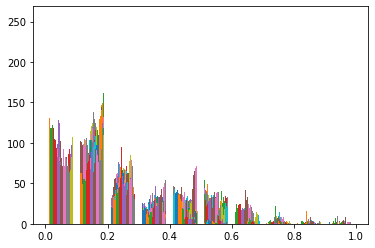

In [7]:

[plt.hist(a[i]) for i in range(8)]

In [8]:
np.stack(a, axis=0).shape

(8, 256, 256)

In [26]:
np.clip(a, 0, 300)

array([[[  0.    ,   0.    , 212.625 , ...,   0.    ,   0.    ,
           0.    ],
        [  0.    ,   0.    , 300.    , ...,   0.    ,   0.    ,
           0.    ],
        [  0.    ,   0.    , 149.1875, ...,   0.    ,   0.    ,
           0.    ],
        ...,
        [  0.    ,   0.    , 165.9375, ...,   0.    ,   0.    ,
           0.    ],
        [  0.    ,   0.    , 146.    , ...,   0.    ,   0.    ,
           0.    ],
        [  0.    ,   0.    ,  31.0625, ...,   0.    ,   0.    ,
           0.    ]],

       [[  0.    ,   0.    ,  34.6875, ...,   0.    ,   0.    ,
           0.    ],
        [  0.    ,   0.    , 143.0625, ...,   0.    ,   0.    ,
           0.    ],
        [  0.    ,   0.    , 159.75  , ...,   0.    ,   0.    ,
           0.    ],
        ...,
        [  0.    ,   0.    ,  41.25  , ...,   0.    ,   0.    ,
           0.    ],
        [  0.    ,   0.    ,  36.625 , ...,   0.    ,   0.    ,
           0.    ],
        [  0.    ,   0.    ,   9.625 , ...,   0.

In [8]:
Param = {
    'LR': 0.00001,
    'WC': 0.0001
}
train_cpu(0, 'densenet')



The model will be running on cpu device
